In [32]:
import tweepy
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import nltk

In [42]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
print(stop_words)

{"you'll", 'an', 'each', 'now', 'needn', 'him', 'of', "that'll", 'was', 'hers', "you're", 'before', 'been', 'to', 'them', 'their', "don't", 'itself', 'they', 'am', 'nor', 'there', 'here', 'we', 'it', "she's", 'whom', 'from', 'under', 'weren', 'this', 'when', "didn't", 'above', 'ma', 'any', 'he', 'ourselves', 'herself', "it's", 're', "mightn't", 'shan', 'doesn', 'some', 'are', 'as', 'which', "you've", 'a', 'such', 'these', 'aren', "isn't", 'ours', 've', 'shouldn', 'having', 'into', "shouldn't", 'do', 'against', 'about', 'y', 'not', 'don', 'couldn', 'who', 'during', "needn't", 'below', 'then', 'if', 'll', "haven't", 'over', 'didn', 'isn', "doesn't", 'doing', 'too', 'through', 'o', 'until', 'than', 's', "wasn't", 'its', 'what', 'up', 'on', 'more', "couldn't", 'have', 'why', 'wouldn', 'theirs', 'same', 'so', 'our', "shan't", 'yours', 'few', 'be', 'at', 'i', 't', 'very', 'again', 'all', 'd', 'ain', 'hasn', 'most', 'or', "weren't", "won't", 'hadn', 'himself', "mustn't", 'mustn', "hasn't", 'o

In [43]:
consumer_key = "Ps53xq4Q3QhZw9z73YTa5CMd6"
consumer_secret = "d0iw3DGui0zziqtr2khsoMPFWz8bZYnEkk5KUyXlCSOtWwAdox"
access_token = "1405823723827986435-aCRNcZUEupzFHYhYyC3tMsqclT28i1"
access_token_secret = "Tmuyx9neADg8ttjyqPrxp5TjqNhV9xFdXo6dLyDEuBURm"

In [44]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [101]:
posts = api.search_tweets("polution", count=1000, tweet_mode = "extended")

In [102]:
print("Show the 10 recent tweets: \n")
i = 1
for tweet in posts[0:10]:
    print(str(i) + ') '+tweet.full_text + '\n')
    i = i+1

Show the 10 recent tweets: 

1) #earthquakeindelhi + corruption + polution 

Le #Delhi wale https://t.co/TfeBHZicd0

2) Je jure que y'a une souris qui viens de me courir dessus DANS MON LIT? J'ai envie de chialer elle rode et elle se cache dans la moustiquaire c'est quoi ce bordel jpp de ce pays et de cette jungle la sortez moi de la pitié j'veux juste être a Paris en mode bien béton bien polution

3) @news24tvchannel @msisodia Polution ke baare main bhi bol..
Sharab mantri..

4) @DaaruBaazMehta @ArvindKejriwal Polution se Delhi walo ko bimar karke.
Khud election main ghoom rahe ho.
Ab koi bewakoof nhi Banega inki baato main aake ..

5) #cop27 #egypte #toutankhamon #conference #rechauffementclimatique #macron #emmanuel #emmanuelmacron #brigitte  #polution #gazaeffetdeserre #co2 #caricature  #dessindujour #dessindepresse #humour #blague #sketch #gregsketch https://t.co/ovKcQ1Mvns

6) @oscarstolemycan @buildordie_ @JoshuaSteinman Even then the cost of working in China will always be chea

In [103]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#show the first 5 rows of data
df.head()

,Tweets
0,#earthquakeindelhi + corruption + polution \n\...
1,Je jure que y'a une souris qui viens de me cou...
2,@news24tvchannel @msisodia Polution ke baare m...
3,@DaaruBaazMehta @ArvindKejriwal Polution se De...
4,#cop27 #egypte #toutankhamon #conference #rech...


In [104]:
#clean the text from hastag, link, mention
import re

#create a function to clean the tweets #r means raw string
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #removed @mentions
    text = re.sub(r'#', '',text) #removing the hastag symbo
    text = re.sub(r'RT[\s]+', '', text) #removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) #removing the hyperlink
    
    return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

,Tweets
0,earthquakeindelhi + corruption + polution \n\n...
1,Je jure que y'a une souris qui viens de me cou...
2,Polution ke baare main bhi bol..\nSharab man...
3,Polution se Delhi walo ko bimar karke.\nKhud...
4,cop27 egypte toutankhamon conference rechauffe...
...,...
95,Bagga zimmedaar hai iska usne na sirf galiyo ...
96,: Electric car batteries probably to blame for...
97,: Add to that the heavy traffic congestion due...
98,It's bizzare. The earth has experienced ice a...


In [105]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two news columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columbs
df

,Tweets,Subjectivity,Polarity
0,earthquakeindelhi + corruption + polution \n\n...,0.000000,0.000000
1,Je jure que y'a une souris qui viens de me cou...,0.000000,0.000000
2,Polution ke baare main bhi bol..\nSharab man...,0.333333,0.166667
3,Polution se Delhi walo ko bimar karke.\nKhud...,0.333333,0.166667
4,cop27 egypte toutankhamon conference rechauffe...,0.000000,0.000000
...,...,...,...
95,Bagga zimmedaar hai iska usne na sirf galiyo ...,0.000000,0.000000
96,: Electric car batteries probably to blame for...,0.250000,0.000000
97,: Add to that the heavy traffic congestion due...,0.308333,-0.108333
98,It's bizzare. The earth has experienced ice a...,0.650000,0.275000


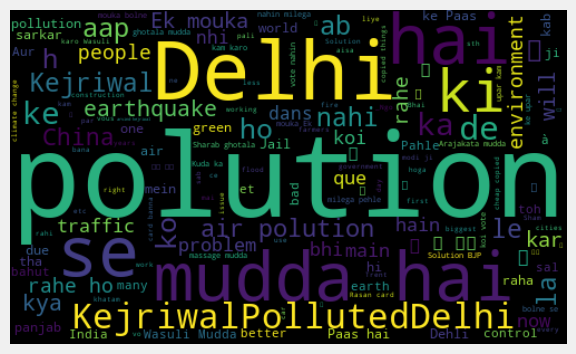

In [106]:
#Plot The Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [107]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,earthquakeindelhi + corruption + polution \n\n...,0.000000,0.000000,Neutral
1,Je jure que y'a une souris qui viens de me cou...,0.000000,0.000000,Neutral
2,Polution ke baare main bhi bol..\nSharab man...,0.333333,0.166667,Positive
3,Polution se Delhi walo ko bimar karke.\nKhud...,0.333333,0.166667,Positive
4,cop27 egypte toutankhamon conference rechauffe...,0.000000,0.000000,Neutral
...,...,...,...,...
95,Bagga zimmedaar hai iska usne na sirf galiyo ...,0.000000,0.000000,Neutral
96,: Electric car batteries probably to blame for...,0.250000,0.000000,Neutral
97,: Add to that the heavy traffic congestion due...,0.308333,-0.108333,Negative
98,It's bizzare. The earth has experienced ice a...,0.650000,0.275000,Positive


In [108]:
#Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):   
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1)   Polution ke baare main bhi bol..
Sharab mantri..

2)   Polution se Delhi walo ko bimar karke.
Khud election main ghoom rahe ho.
Ab koi bewakoof nhi Banega inki baato main aake ..

3)  _  Even then the cost of working in China will always be cheaper - enwrgy, polution regulations, etc. And I will bet with you that it will take more than 10 years to get to those 90%.
Not because we can't, but because it will still be cheaper to use humans.

4) _ polution polution kar rahe ho😭 ek baat batao agar delhi mai bjp aa jaye to ye khatam ho jayega ????? I m 52 yrs old and having bronchitis but I have no problem with this pollution. I m used to no problem at all 🙏

5)  Corporate mass polution is real … ‘climate change’ is weather rebranded … just like flu and ‘covid’

6)  Polution pe kitne sal lagenge  sab 8 sal to ho gaye delhi ki sadak kab theek rahegi pure sal

7)  _twid  First why are you replying just now? Second, think with me. Of there is a lot of polution involved in making EV's and t

In [110]:
#Print the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending = False)
for i in range(0, sortedDF.shape[0]):
    if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j = j+1

1) : _Delhi Din Me polution, Sham ko Grahan, Raat me Earthquake..Bhagwan chah kya rhe hain 😂

2) _Delhi Din Me polution, Sham ko Grahan, Raat me Earthquake..Bhagwan chah kya rhe hain 😂

3) Jail me Wasuli Mudda hai  ,Danga Mudda hai Arajakata mudda hai  ,Polution mudda hai  , Jail me massage  mudda hai   , Sharab ghotala mudda hai  , Kuda ka Solution  BJP ke Paas hai  .  Ek mouka ,Ek mouka bolne se koi vote nahin milega  .pehle Mudda ke upar kam karo

4)  Wasuli Mudda hai  , Arajakata mudda hai  ,Polution mudda hai  , Jail me massage  mudda hai  , Rasan card  banna mudda hai  , Sharab ghotala mudda hai  , Kuda ka Solution  BJP ke Paas hai  .  Ek mouka ,Ek mouka bolne se koi vote nahin milega  .pehle Mudda ke upar kam karo

5)  Wasuli Mudda hai  , Arajakata mudda hai  ,Polution mudda hai  , Jail me massage  mudda hai  , Rasan card  banna mudda hai  , Sharab ghotala mudda hai  , Kuda ka Solution  BJP ke Paas hai  .  Ek mouka ,Ek mouka bolne se koi vote nahin milega  .pehle Mudda ke upar k

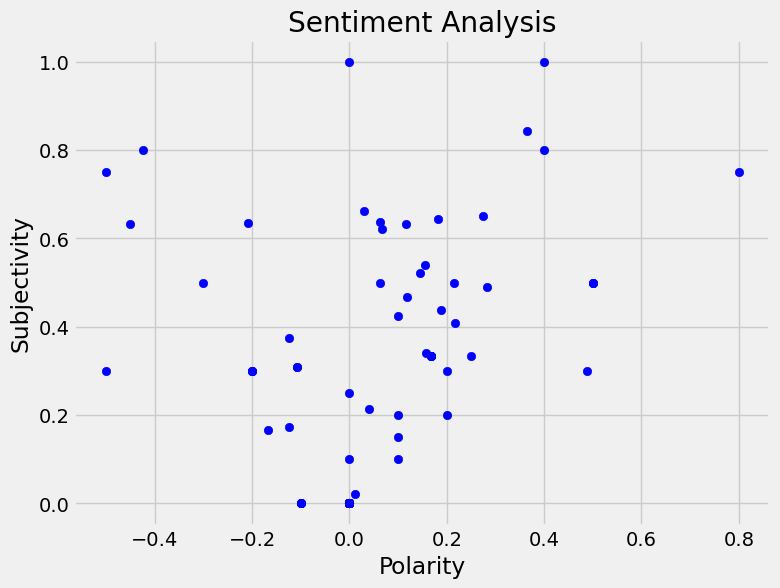

In [111]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [112]:
#Get the percentage of possitive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) *100, 1)

36.0

In [113]:
#Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0] *100), 1)

18.0

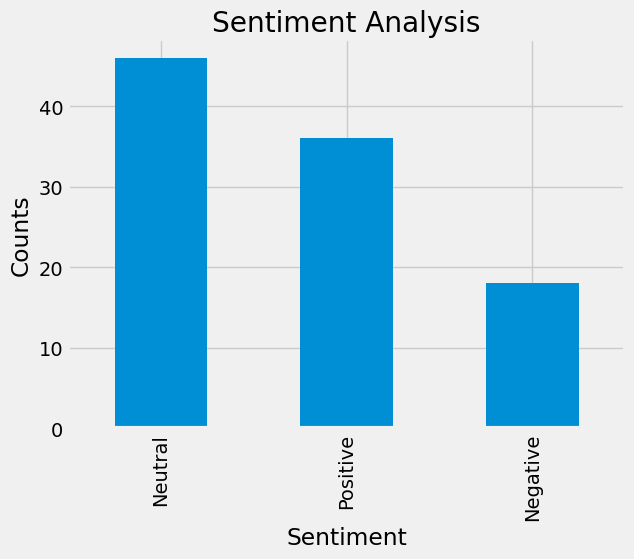

In [114]:
#Show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()